# EDA Q1: Does the distance between a house and downtown Seattle affect house price?

* **sqft_livingsquare** -  footage of the home
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Import Cleaned Data

In [13]:
data = pd.read_csv('added_features_data.csv',index_col=0)
cleaned_data = data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19087 non-null  float64
 1   bedrooms       19087 non-null  int64  
 2   bathrooms      19087 non-null  float64
 3   sqft_living    19087 non-null  int64  
 4   sqft_lot       19087 non-null  int64  
 5   floors         19087 non-null  float64
 6   waterfront     19087 non-null  int64  
 7   view           19087 non-null  int64  
 8   condition      19087 non-null  int64  
 9   sqft_above     19087 non-null  int64  
 10  sqft_basement  19087 non-null  float64
 11  yr_built       19087 non-null  int64  
 12  zipcode        19087 non-null  int64  
 13  lat            19087 non-null  float64
 14  long           19087 non-null  float64
 15  sqft_living15  19087 non-null  int64  
 16  sqft_lot15     19087 non-null  int64  
 17  quarter_sold   19087 non-null  int64  
 18  year_s

In [15]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement
0,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,...,47.7210,-122.319,1690,7639,4,2014,1950,Fair,1,1
1,180000.0,2,1.00,770,10000,1.0,0,0,3,770,...,47.7379,-122.233,2720,8062,1,2015,1930,Fair,0,0
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,...,47.5208,-122.393,1360,5000,4,2014,1960,Fair,0,1
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,...,47.6168,-122.045,1800,7503,1,2015,1980,Fair,0,0
4,1230000.0,4,4.50,5420,101930,1.0,0,0,3,3890,...,47.6561,-122.005,4760,101930,2,2014,2000,Good,0,1


In [16]:
# dataframe for latitude and longitude for each house, and price
df_house_location = data[['price','lat','long']]

df_house_location.head()

,price,lat,long
0,538000.0,47.7210,-122.319
1,180000.0,47.7379,-122.233
2,604000.0,47.5208,-122.393
3,510000.0,47.6168,-122.045
4,1230000.0,47.6561,-122.005


## 2. Calculate Distance Between House and Downtown Seattle

In [17]:
from haversine import haversine, Unit

In [18]:
# latitude and longitude of downtown seattle
downtown_seattle_location = (47.608013, -122.335167)

# latitude and longitude of each house in the cleaned dataset
house_location = list(zip(data['lat'],data['long']))

# calculate distance in miles between each house and downtown seattle
distance = pd.DataFrame({'distance':[round(haversine(downtown_seattle_location, house, unit='mi'),2) 
                                     for house in house_location]})
distance.head()

,distance
0,7.84
1,10.16
2,6.60
3,13.53
4,15.73


In [19]:
# concat house and distance into one dataframe
house_distance = pd.concat([df_house_location, distance],axis=1)
house_distance.head()

,price,lat,long,distance
0,538000.0,47.7210,-122.319,7.84
1,180000.0,47.7379,-122.233,10.16
2,604000.0,47.5208,-122.393,6.60
3,510000.0,47.6168,-122.045,13.53
4,1230000.0,47.6561,-122.005,15.73


## 3. Check Linearity Assumption

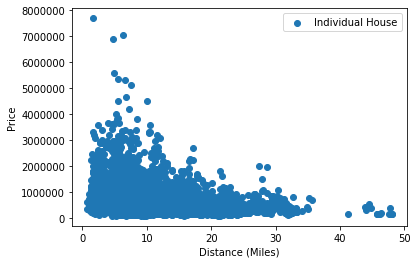

In [20]:
plt.scatter(house_distance['distance'],house_distance['price'],label='Individual House')
plt.xlabel('Distance (Miles)')
plt.ticklabel_format(style='plain')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4. Check Normality for Variables

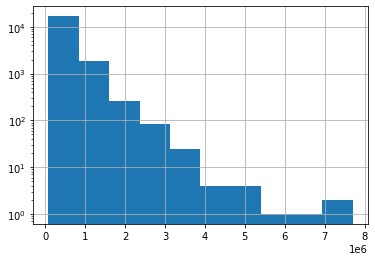

In [21]:
house_distance['price'].hist().set_yscale('log')

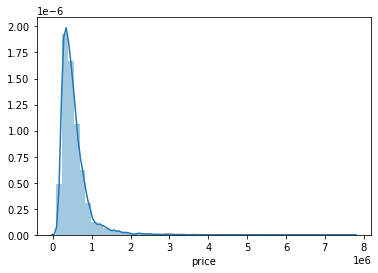

In [22]:
sns.distplot(house_distance['price']);

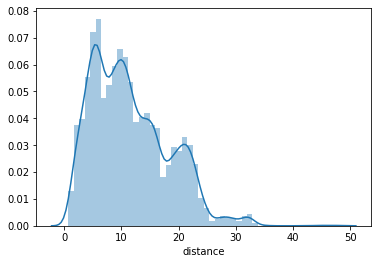

In [23]:
sns.distplot(house_distance['distance']);

## 5. Simple Linear Regression

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
f = 'price~distance'

model = ols(formula=f,data=house_distance).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1723.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        03:07:43   Log-Likelihood:            -2.7110e+05
No. Observations:               19087   AIC:                         5.422e+05
Df Residuals:                   19085   BIC:                         5.422e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.28e+05   5152.356    141.301      0.000    7.18e+05    7.38e+05
distance   -1.603e+04    386.233    -41.512      0.000   -1.68e+04   -1.53e+04
==============================================================================
Omnibus:                    17604.450   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1267536.236
Skew:                           4.235   Prob(JB):                         0.00
Kurtosis:                      42.014   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

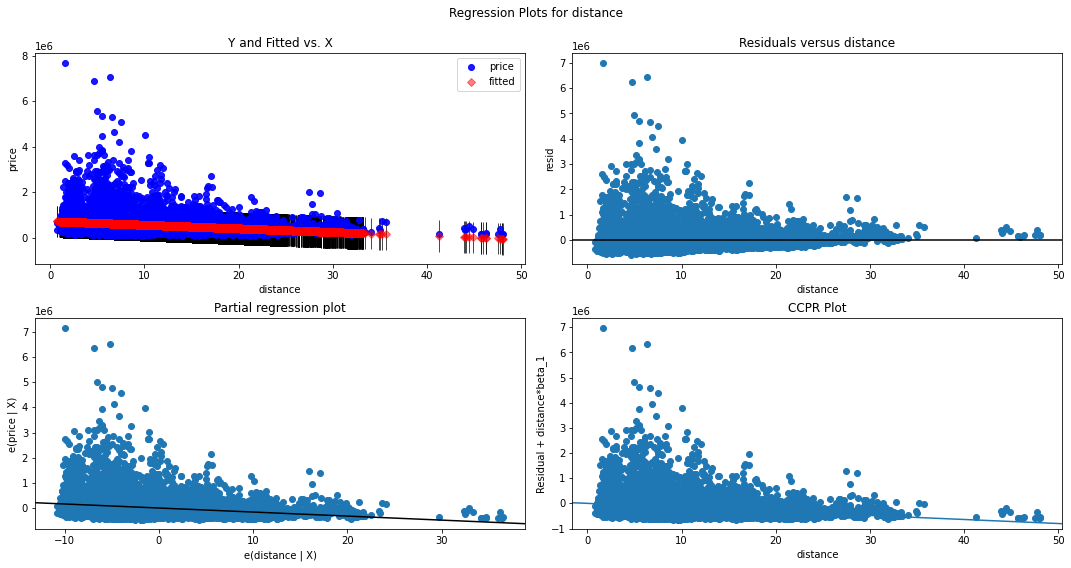

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'distance',fig=fig)
plt.show()

## 6. Normality Check

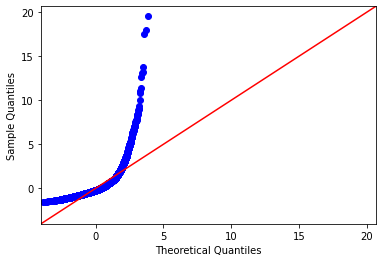

In [27]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
fig.show()

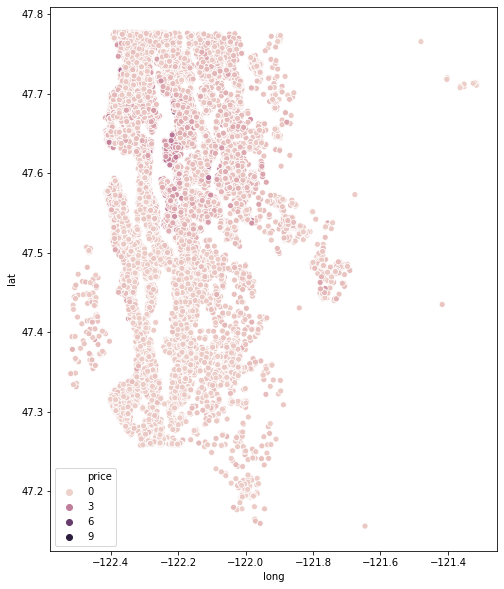

In [29]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='long',y='lat',hue='price',data=house_distance)
plt.legend(fancybox=True);

# Interpretation

* There is no relationship between price and distance between the home and downtown seattle.
* Normality for each variables are very skewed.
* Normality for the residuals is very curved and distorted meaning the residuals hae a non-normal distribiution.
* Low R-squared in which there is no good fit.
* There is heteroscedasticity in the data indicating variability is unequal across the distance values.

Overall, this was definitely not a good model with an R-squared of 0.083.